# Support Vector Machine (SVM)

SVM é um poderoso e versátil algoritmo de aprendizado supervisionado, capaz de realizar classificação, regressão e detecção de outliers.

A ideia principal do SVM para classificação é encontrar um **hiperplano** que melhor separe as diferentes classes no espaço de features. "Melhor" aqui significa o hiperplano que tem a **maior margem**, ou seja, a maior distância entre ele e os pontos de dados mais próximos de cada classe.

**Conceitos-chave:**
- **Vetores de Suporte (*Support Vectors*)**: São os pontos de dados que ficam mais próximos do hiperplano e que o definem. Se removermos esses pontos, o hiperplano mudaria.
- **Margem**: A distância entre o hiperplano e os vetores de suporte.
- **Kernel Trick**: Uma técnica poderosa que permite ao SVM lidar com dados não linearmente separáveis, mapeando-os para um espaço de dimensão maior onde uma separação linear se torna possível. Os kernels mais comuns são `linear`, `poly` e `rbf` (Radial Basis Function).

### Parte 1: SVM com Kernel Linear (Dados Linearmente Separáveis)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [6]:
# Gerando dados linearmente separáveis
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=0.6)

# Criando e treinando o modelo SVM com kernel linear
model_linear = SVC(kernel='linear', C=1E10) # C alto para forçar uma margem rígida
model_linear.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

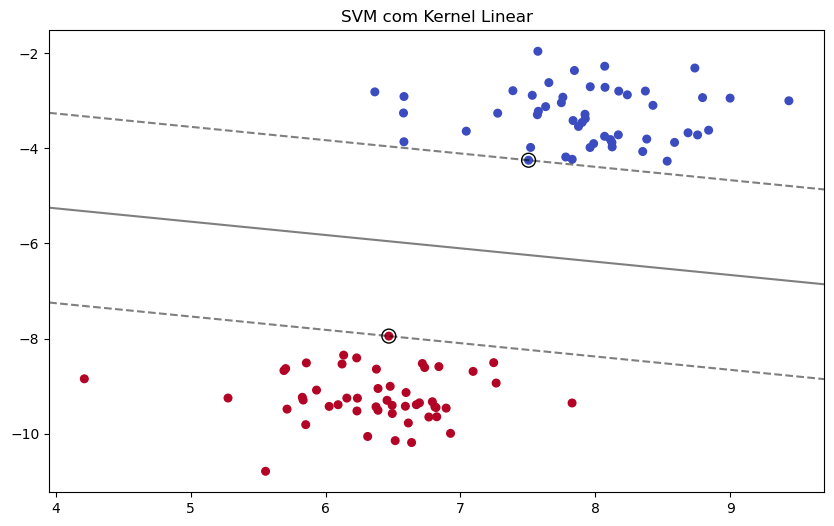

In [7]:
# Função para plotar o resultado do SVM
def plot_svm_boundary(model, X, y, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)
    
    # Plotar a fronteira de decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plotar hiperplano e margens
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Destacar os vetores de suporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

plot_svm_boundary(model_linear, X, y, 'SVM com Kernel Linear')

No gráfico acima, a linha contínua é o hiperplano de decisão. As linhas tracejadas representam a margem, e os pontos circulados são os vetores de suporte.

### Parte 2: SVM com Kernel RBF (Dados Não Linearmente Separáveis)

In [8]:
from sklearn.datasets import make_circles

In [9]:
# Gerando dados em formato de círculo
X_circle, y_circle = make_circles(100, factor=.1, noise=.1, random_state=42)

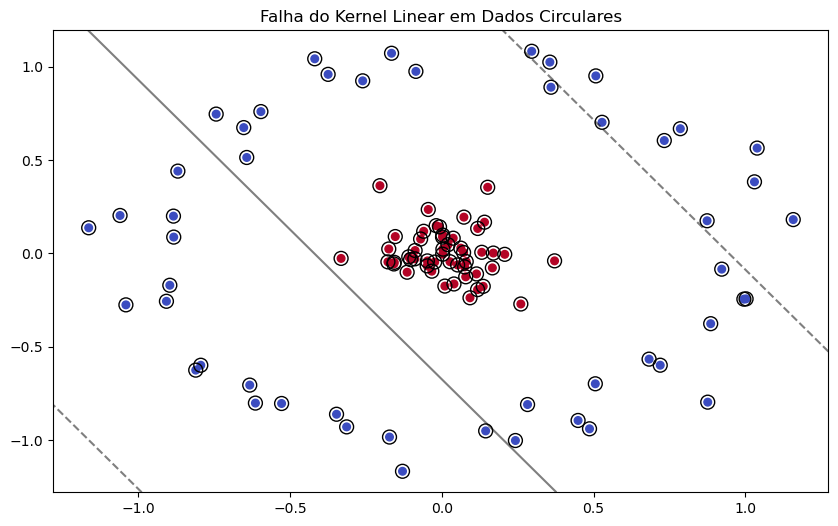

In [10]:
# Treinando com kernel linear (para mostrar que não funciona)
model_linear_fail = SVC(kernel='linear').fit(X_circle, y_circle)
plot_svm_boundary(model_linear_fail, X_circle, y_circle, 'Falha do Kernel Linear em Dados Circulares')

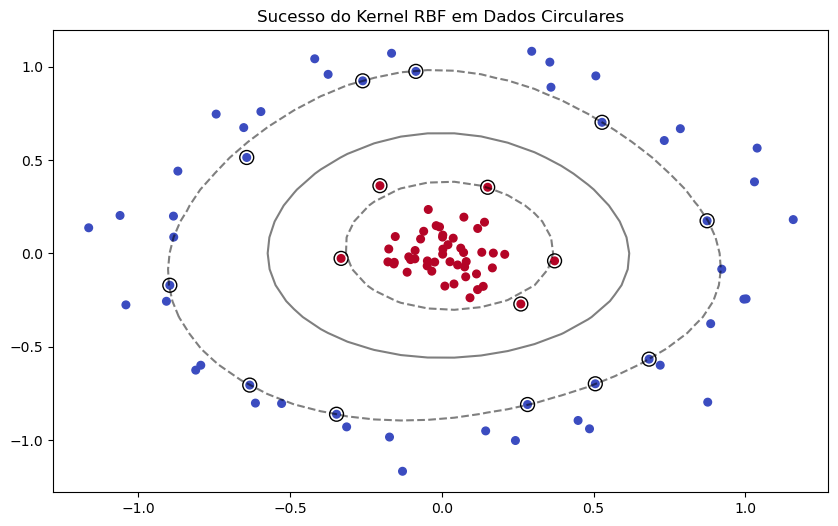

In [11]:
# Treinando com kernel RBF (Radial Basis Function)
model_rbf = SVC(kernel='rbf').fit(X_circle, y_circle)
plot_svm_boundary(model_rbf, X_circle, y_circle, 'Sucesso do Kernel RBF em Dados Circulares')

Como podemos ver, o kernel linear é incapaz de separar os círculos. No entanto, o kernel RBF cria uma fronteira de decisão não linear complexa que classifica os dados perfeitamente. Este é o poder do **kernel trick**.